Epoch 1/50


/Users/upenderchitla3/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.3057 - val_loss: 0.1100
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1670 - val_loss: 0.1409
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1648 - val_loss: 0.0802
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1107 - val_loss: 0.0768
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1130 - val_loss: 0.0932
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1171 - val_loss: 0.0850
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1111 - val_loss: 0.0754
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1002 - val_loss: 0.0817
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1043 - val_loss: 0.0805
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1099 - val_loss: 0.0747
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1036 - val_loss: 0.0747
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1016 - val_loss: 0.0745
Epoch 13/50


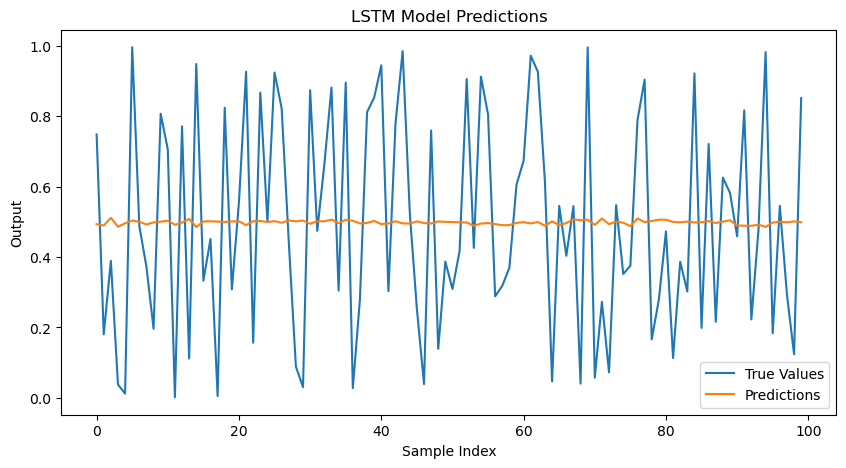

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Placeholder function for data loading and preprocessing
def load_and_preprocess_data():
    # This function should load your data and preprocess it
    # For the purpose of this example, let's create dummy data
    # Assume each sample has 100 time steps and each step has 1 feature
    np.random.seed(0)
    X = np.random.rand(100, 100, 1)  # 100 samples, 100 timesteps, 1 feature
    y = np.random.rand(100, 1)  # 100 target values
    return X, y

# Function to build the LSTM model
def build_lstm_model(input_shape, units, dropout_rate):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=input_shape),
        Dropout(dropout_rate),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    return model

# Load and preprocess the data
X, y = load_and_preprocess_data()

# Model configuration
input_shape = (X.shape[1], X.shape[2])  # Time steps and features per timestep
units = 50  # LSTM units
dropout_rate = 0.2  # Dropout rate

# Build and compile the LSTM model
model = build_lstm_model(input_shape, units, dropout_rate)

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model using MSE and MAE
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualize the model's predictions
plt.figure(figsize=(10, 5))
plt.plot(y, label='True Values')
plt.plot(predictions, label='Predictions')
plt.title('LSTM Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.legend()
plt.show()

# Placeholder for hyperparameter tuning
# Implement grid search or random search here to optimize hyperparameters